In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv('./data/house_data.csv', low_memory=False)
data.head()


,URL,Adresse,Year build,Pris,Type,Energimærke,Ejerudgift,Boligydelse,Anvendelse,Boligtype,...,Kommunal ejerlav navn,Grundstørrelse,Lands ejerlav kode,Vejareal,Lands ejerlav navn,Primær matrikel,Ejendomsnummer,Kommunal ejerlav kode,Ejendomsværdiskat,Grundskyld
0,https://www.boliga.dk/bolig/1729830/krebsen_78...,Krebsen 78 5700 Svendborg,2006,225000,Andelsbolig,C,NaN,6717,Række kæde eller dobbelthus lodret adskillelse...,Egentlig beboelseslejlighed boligenhed med ege...,...,EGENSE BY EGENS,7221.0,430451.0,0.0,EGENSE BY EGENSE,J,194920.0,19.0,0.0,0.0
1,https://www.boliga.dk/bolig/1729730/fiskeparke...,Fiskeparken 25 Snaptun 7130 Juelsminde,2000,295000,Andelsbolig,C,NaN,6374,Fritliggende enfamiliehus,Egentlig beboelseslejlighed boligenhed med ege...,...,ØSTRUP BY GLUD,9924.0,1100452.0,245.0,ØSTRUP BY GLUD,J,16078.0,160.0,0.0,0.0
2,https://www.boliga.dk/bolig/1729667/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.boliga.dk/bolig/1729849/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.boliga.dk/bolig/1729668/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Sort data to get only fritidshus 
data = data[data['Type'] == 'Fritidshus']

In [3]:
# drop all none relevant data
data.drop([
    'Vejareal',
    'Lands ejerlav kode',
    'Kommunal ejerlav kode',
    'Ejendomsnummer',
    'Primær matrikel',
    'Lands ejerlav navn',
    'Kommunal ejerlav navn',
    'Matrikelnummer',
    'Afvigende etager',
    'Boligstørrelse tinglyst',
    'Objekt status',
    'Boligstørrelse BBR',
    'Bygningsnummer',
    'Beboelsesareal',
    'URL',
    'Boligydelse',
    'Anvendelse',
    'Type'
], 'columns', inplace=True)

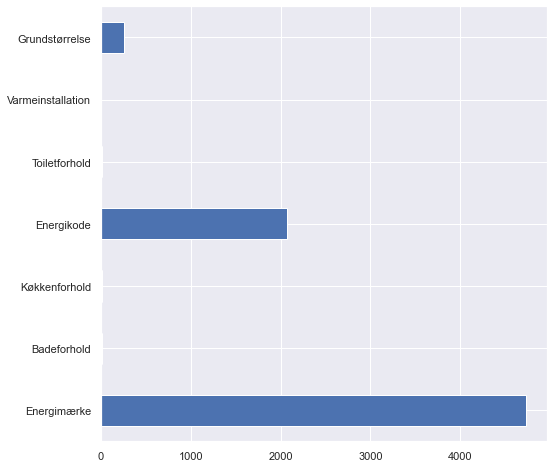

In [4]:
sb.set(font_scale=1)
data_null = data.isna().sum()
plt.figure(figsize=(8,8))
data_null[data_null!=0].plot(kind='barh');

In [5]:
# drop columns if lot of missing values
data.drop(['Energikode','Energimærke'], 'columns', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4927 entries, 15 to 38580
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Adresse                      4927 non-null   object 
 1   Year build                   4927 non-null   object 
 2   Pris                         4927 non-null   object 
 3   Ejerudgift                   4927 non-null   object 
 4   Boligtype                    4927 non-null   object 
 5   Enhedsareal                  4927 non-null   object 
 6   Værelser                     4927 non-null   float64
 7   Antal toiletter              4927 non-null   float64
 8   Badeforhold                  4918 non-null   object 
 9   Antal badeværelser           4927 non-null   float64
 10  Køkkenforhold                4917 non-null   object 
 11  Toiletforhold                4918 non-null   object 
 12  Ydervæg                      4927 non-null   object 
 13  Tag             

In [6]:
# Find missing values in the data and drop those rows:
print('rows before drop n/a',len(data))
bool_matrix = data.isnull() # dataframe with True and False values for each cell in the data
only_null_filter = bool_matrix.any(axis=1) # is there a True value in any column in each row. returns a pandas Series with index matching index of villa dataframe
missing = data[only_null_filter] # show all rows that has one or more null values
data = data.dropna()
print('rows after',len(data))
#pd.options.display.max_rows = None # let me see all rows in the dataframe (can be used with columns too)
#villa_data
#bool_matrix

rows before drop n/a 4927
rows after 4655


In [7]:
# Address to zipcode
data['Adresse'] = data['Adresse'].str.extract(r'(\d{4})').astype('int')

# Year build
data['Year build'] = data['Year build'].astype('int')

# Price
data['Pris'] = data['Pris'].astype('float')

# Ejerudgift
data['Ejerudgift'] = data['Ejerudgift'].astype('float')

# Enhedsareal
data['Enhedsareal'] = data['Enhedsareal'].astype('float')
#Grundstørrelse
data['Grundstørrelse'] = data['Grundstørrelse'].astype('float')

data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4655 entries, 20 to 38580
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Adresse                      4655 non-null   int64  
 1   Year build                   4655 non-null   int64  
 2   Pris                         4655 non-null   float64
 3   Ejerudgift                   4655 non-null   float64
 4   Boligtype                    4655 non-null   object 
 5   Enhedsareal                  4655 non-null   float64
 6   Værelser                     4655 non-null   float64
 7   Antal toiletter              4655 non-null   float64
 8   Badeforhold                  4655 non-null   object 
 9   Antal badeværelser           4655 non-null   float64
 10  Køkkenforhold                4655 non-null   object 
 11  Toiletforhold                4655 non-null   object 
 12  Ydervæg                      4655 non-null   object 
 13  Tag             

In [8]:
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Adresse,Year build,Pris,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Carport,Seneste ombygning,Udhus,Boligstørrelse,Boligenhed med eget køkken,Boligenhed uden eget køkken,Grundstørrelse,Ejendomsværdiskat,Grundskyld
count,4655.000000,4655.000000,4.655000e+03,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000,4655.000000
mean,6934.300752,1974.255209,1.783447e+06,2015.620408,90.275403,3.968636,1.259076,1.172288,1.006874,0.420193,649.042105,1.369495,89.026208,0.099248,0.000644,2952.705693,7190.417615,8342.475403
std,2204.724266,92.519006,1.485286e+06,1167.605952,48.886688,1.386086,0.717147,0.696209,0.087681,3.383080,934.985849,5.064188,50.290358,0.299027,0.025381,15020.328126,5591.666033,8020.532625
min,2300.000000,0.000000,1.500000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,3630.000000,1956.000000,6.750000e+05,1070.000000,50.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,600.000000,2730.000000,2103.800000
25%,4873.000000,1969.000000,8.950000e+05,1321.000000,63.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,63.000000,0.000000,0.000000,969.000000,4100.000000,3816.000000
50%,6960.000000,1978.000000,1.395000e+06,1758.000000,82.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,81.000000,0.000000,0.000000,1244.000000,6300.000000,6491.000000
75%,9300.000000,1998.000000,2.095000e+06,2393.000000,107.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1986.500000,0.000000,106.000000,0.000000,0.000000,1796.500000,9240.000000,10655.000000
90%,9670.000000,2008.000000,3.196800e+06,3214.000000,137.000000,5.000000,2.000000,2.000000,1.000000,0.000000,2004.000000,5.000000,135.000000,0.000000,0.000000,2917.200000,12600.000000,16167.800000
max,9990.000000,2021.000000,1.920000e+07,23808.000000,1392.000000,28.000000,18.000000,18.000000,3.000000,51.000000,2020.000000,203.000000,2069.000000,1.000000,1.000000,352700.000000,189625.000000,152951.000000


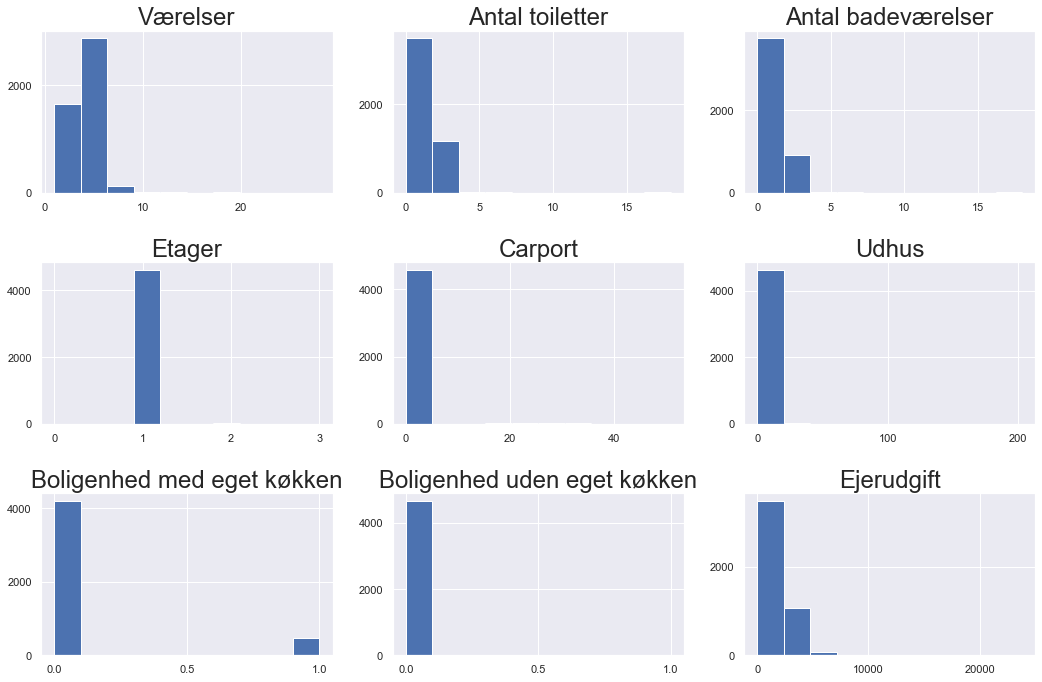

In [9]:


#pick out features, which have one dominant value in the whole sample
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
sb.set(font_scale=2)

data['Værelser'].hist(ax=axes[0,0])
axes[0,0].set_title('Værelser')

data['Antal toiletter'].hist(ax=axes[0,1])
axes[0,1].set_title('Antal toiletter')

data['Antal badeværelser'].hist(ax=axes[0,2])
axes[0,2].set_title('Antal badeværelser')

data['Etager'].hist(ax=axes[1,0])
axes[1,0].set_title('Etager')

data['Carport'].hist(ax=axes[1,1])
axes[1,1].set_title('Carport')

data['Udhus'].hist(ax=axes[1,2])
axes[1,2].set_title('Udhus')

data['Boligenhed med eget køkken'].hist(ax=axes[2,0])
axes[2,0].set_title('Boligenhed med eget køkken')

data['Boligenhed uden eget køkken'].hist(ax=axes[2,1])
axes[2,1].set_title('Boligenhed uden eget køkken')

data['Ejerudgift'].hist(ax=axes[2,2])
axes[2,2].set_title('Ejerudgift')

plt.tight_layout()

# drop features
#boligenhed med
data.drop([
    'Carport',
    'Udhus',
    'Boligenhed uden eget køkken',
    'Etager'
], 'columns', inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4655 entries, 20 to 38580
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Adresse                     4655 non-null   int64  
 1   Year build                  4655 non-null   int64  
 2   Pris                        4655 non-null   float64
 3   Ejerudgift                  4655 non-null   float64
 4   Boligtype                   4655 non-null   object 
 5   Enhedsareal                 4655 non-null   float64
 6   Værelser                    4655 non-null   float64
 7   Antal toiletter             4655 non-null   float64
 8   Badeforhold                 4655 non-null   object 
 9   Antal badeværelser          4655 non-null   float64
 10  Køkkenforhold               4655 non-null   object 
 11  Toiletforhold               4655 non-null   object 
 12  Ydervæg                     4655 non-null   object 
 13  Tag                         465

In [11]:
# Categorical features

pd.set_option('display.max_columns', 40)
data.describe(include='all')

,Adresse,Year build,Pris,Ejerudgift,Boligtype,Enhedsareal,Værelser,Antal toiletter,Badeforhold,Antal badeværelser,Køkkenforhold,Toiletforhold,Ydervæg,Tag,Seneste ombygning,Boligstørrelse,Boligenhed med eget køkken,Varmeinstallation,Grundstørrelse,Ejendomsværdiskat,Grundskyld
count,4655.000000,4655.000000,4.655000e+03,4655.000000,4655,4655.000000,4655.000000,4655.000000,4655,4655.000000,4655,4655,4655,4655,4655.000000,4655.000000,4655.000000,4655,4655.000000,4655.000000,4655.000000
unique,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,3,NaN,4,3,10,11,NaN,NaN,NaN,9,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Sommer fritidsbolig,NaN,NaN,NaN,Badeværelse i enheden,NaN,Eget køkken med afløb,Vandskyllende toilet i enheden,Træ,Fibercement herunder asbest,NaN,NaN,NaN,Elvarme,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,4549,NaN,NaN,NaN,4394,NaN,4560,4515,3406,1877,NaN,NaN,NaN,3510,NaN,NaN,NaN
mean,6934.300752,1974.255209,1.783447e+06,2015.620408,NaN,90.275403,3.968636,1.259076,NaN,1.172288,NaN,NaN,NaN,NaN,649.042105,89.026208,0.099248,NaN,2952.705693,7190.417615,8342.475403
std,2204.724266,92.519006,1.485286e+06,1167.605952,NaN,48.886688,1.386086,0.717147,NaN,0.696209,NaN,NaN,NaN,NaN,934.985849,50.290358,0.299027,NaN,15020.328126,5591.666033,8020.532625
min,2300.000000,0.000000,1.500000e+05,0.000000,NaN,0.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,4.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,4873.000000,1969.000000,8.950000e+05,1321.000000,NaN,63.000000,3.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,63.000000,0.000000,NaN,969.000000,4100.000000,3816.000000
50%,6960.000000,1978.000000,1.395000e+06,1758.000000,NaN,82.000000,4.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,81.000000,0.000000,NaN,1244.000000,6300.000000,6491.000000
75%,9300.000000,1998.000000,2.095000e+06,2393.000000,NaN,107.000000,5.000000,2.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1986.500000,106.000000,0.000000,NaN,1796.500000,9240.000000,10655.000000


<ipython-input-12-95b6e44063a6>:12: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


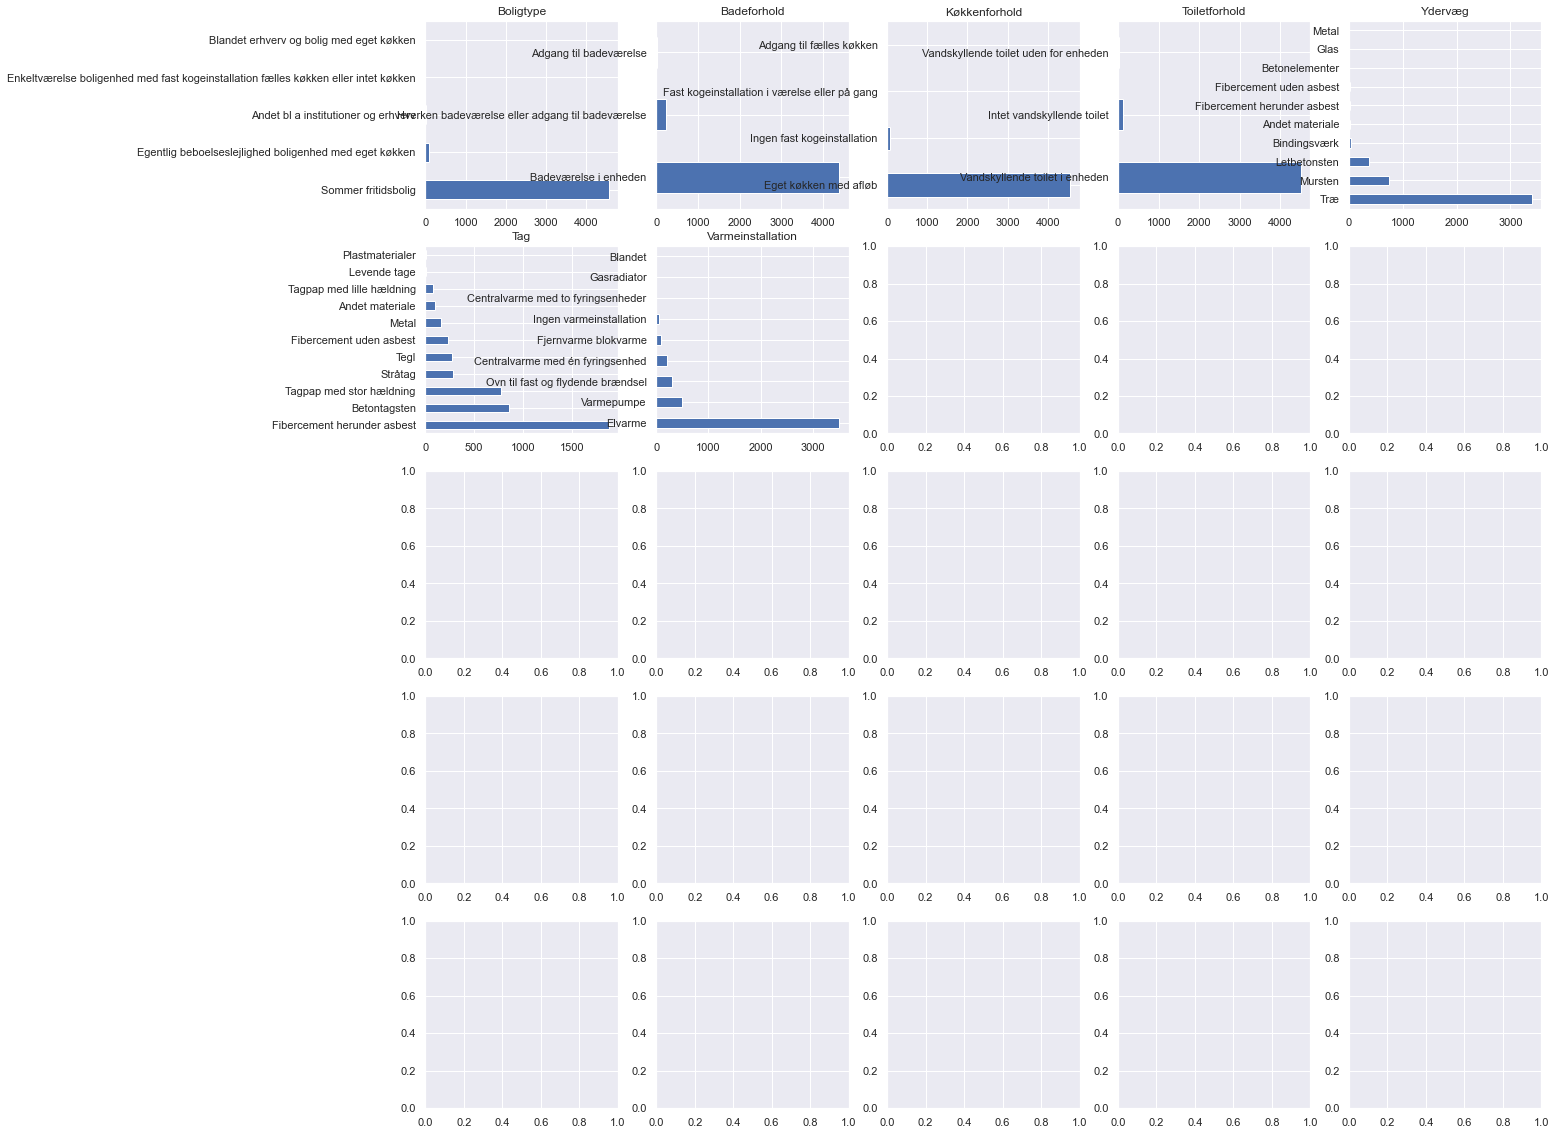

In [12]:
sb.set()
lst_out = ['Boligtype', 'Badeforhold',
           'Køkkenforhold', 'Toiletforhold',
           'Ydervæg', 'Tag', 'Varmeinstallation']
sb.set(font_scale=1)
n_row = 5
n_col = 5
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
for i in enumerate(lst_out):
    pd.value_counts(data[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

# drop features
data.drop([
    'Boligtype',
    'Badeforhold',
    'Køkkenforhold',
    'Toiletforhold',
    'Boligstørrelse'
], 'columns', inplace=True)


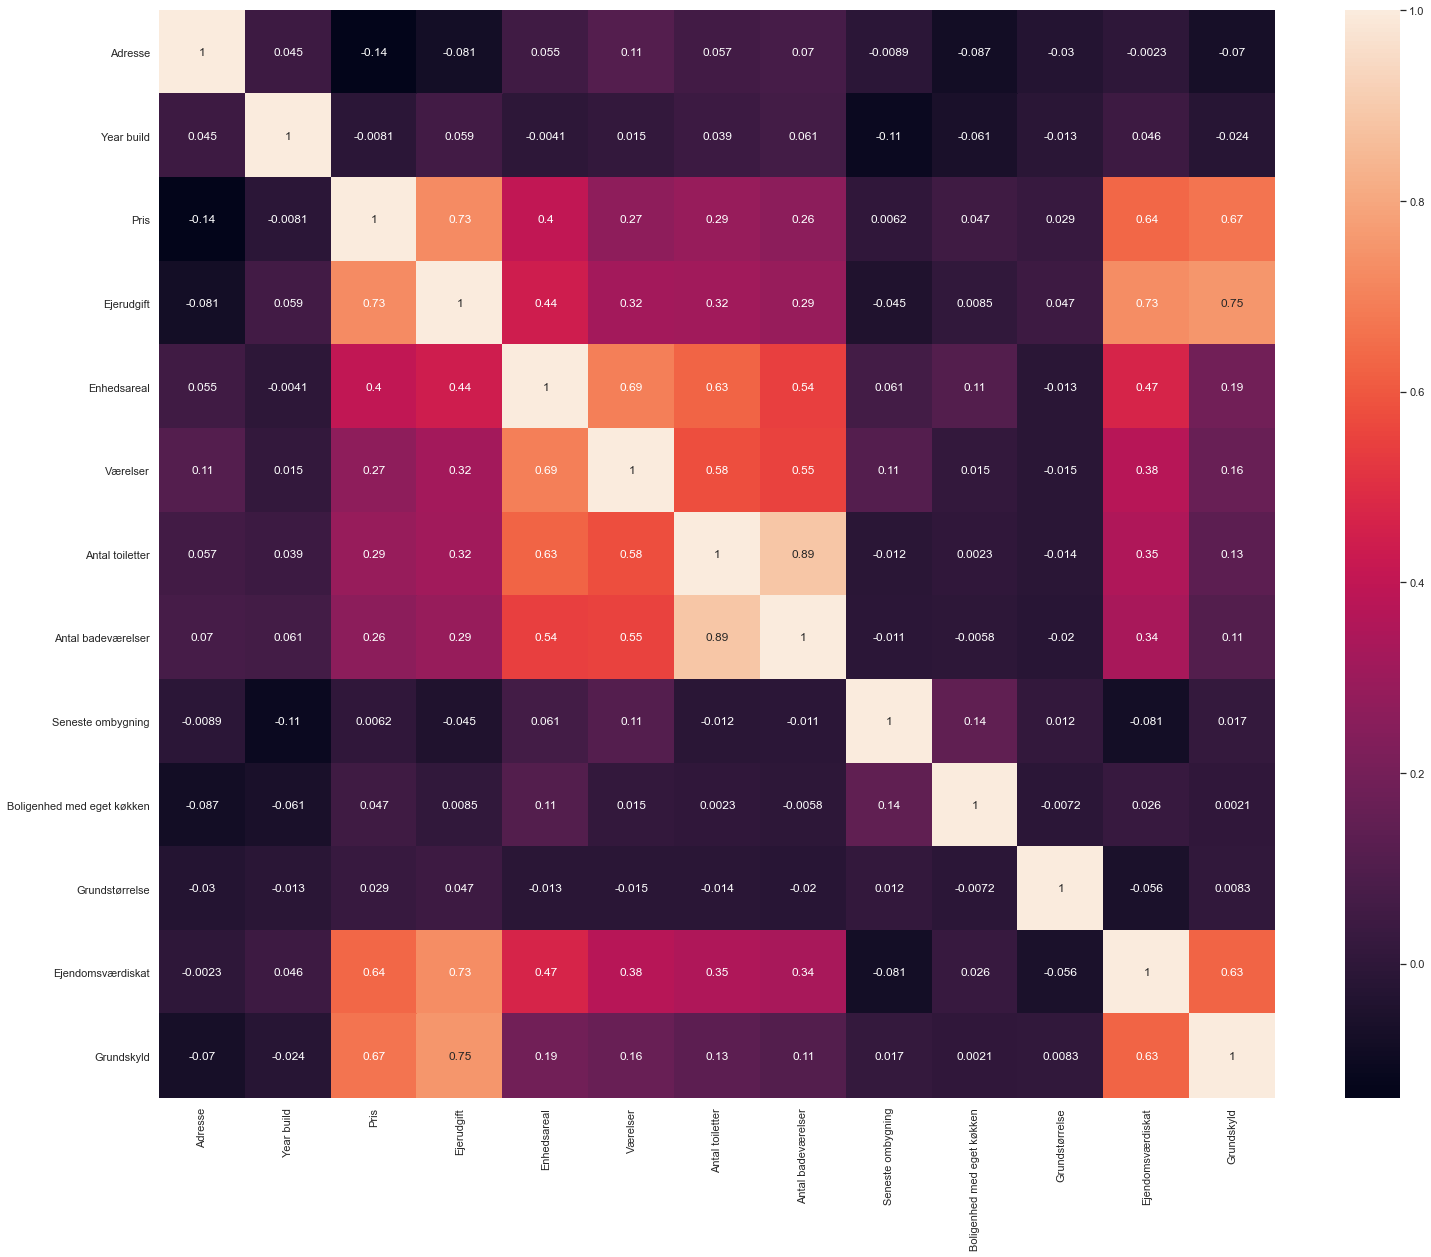

In [13]:
#Corrplot

plt.figure(figsize=(25,20))
sb.set(font_scale=1)
sb.heatmap(data.corr(),annot=True);


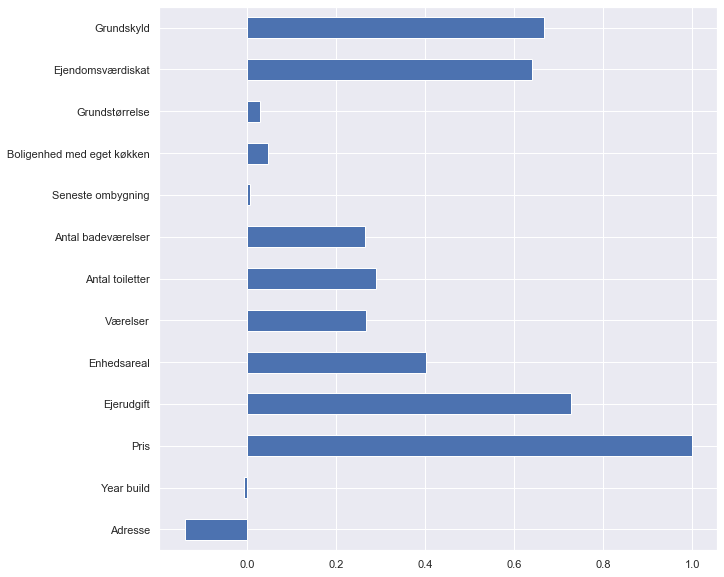

In [14]:
plt.figure(figsize=(10,10))
data.corr()['Pris'].plot(kind='barh');

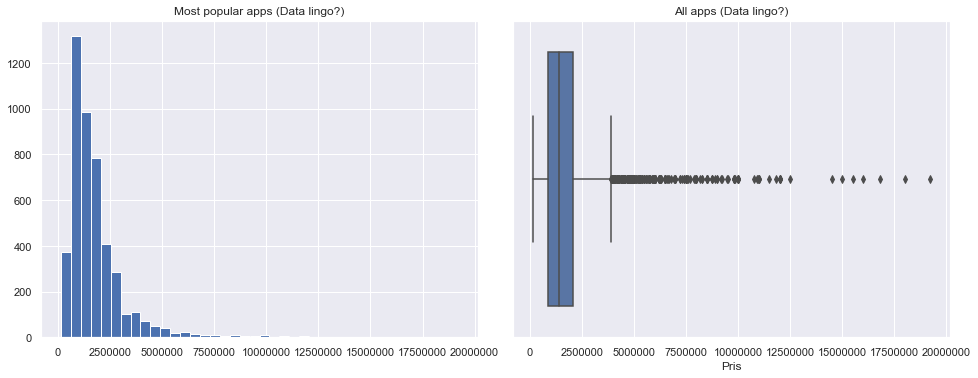

In [15]:
# target
fig = plt.figure(figsize=(20,10))
sb.set(font_scale=1)
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Most popular apps (Data lingo?)')
ax1.ticklabel_format(style='plain')
data['Pris'].hist(bins=40);

ax2 = fig.add_subplot(2,3,2)
ax2.set_title('All apps (Data lingo?)')
ax2.ticklabel_format(style='plain')
sb.boxplot(x=data['Pris'])
plt.tight_layout()

In [16]:
# drop data with abnormal target value
print(pd.value_counts(data['Værelser']<21))
data = data[data['Værelser']<21] 
print(pd.value_counts(data['Pris']<3000000))
data = data[data['Pris']<3000000]

print(pd.value_counts(data['Grundstørrelse']<2350))
data = data[data['Grundstørrelse']<2350]

print(pd.value_counts(data['Grundstørrelse']>500))
data=data[data['Grundstørrelse']>500]



#target_val = data_new['SalePrice'].values
data.head()

True     4654
False       1
Name: Værelser, dtype: int64
True     4148
False     506
Name: Pris, dtype: int64
True     3461
False     687
Name: Grundstørrelse, dtype: int64
True     3084
False     377
Name: Grundstørrelse, dtype: int64


,Adresse,Year build,Pris,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Seneste ombygning,Boligenhed med eget køkken,Varmeinstallation,Grundstørrelse,Ejendomsværdiskat,Grundskyld
20,4500,1971,565000.0,1388.0,58.0,3.0,1.0,0.0,Træ,Tagpap med stor hældning,0.0,1.0,Elvarme,1261.0,3200.0,6123.0
23,4300,1967,500000.0,1087.0,6.0,1.0,0.0,0.0,Træ,Fibercement herunder asbest,0.0,0.0,Ingen varmeinstallation,2110.0,2310.0,3734.0
27,9560,1985,649000.0,1110.0,57.0,4.0,1.0,1.0,Træ,Fibercement herunder asbest,0.0,0.0,Elvarme,1215.0,3400.0,3900.0
40,4873,1965,795000.0,1744.0,65.0,3.0,1.0,1.0,Letbetonsten,Tagpap med lille hældning,0.0,0.0,Elvarme,1000.0,3675.0,9447.0
52,4970,2009,1045000.0,1061.0,74.0,4.0,1.0,1.0,Træ,Betontagsten,0.0,0.0,Elvarme,1200.0,4095.0,2760.0


In [17]:
numer = set(data.corr()['Pris'].index)
categ = list(set(data.columns) - set(data.corr()['Pris'].index))
print ("numer: " + str(numer))
print("-------------")
print ("categ: " + str(categ))

numer: {'Ejerudgift', 'Grundstørrelse', 'Adresse', 'Værelser', 'Ejendomsværdiskat', 'Pris', 'Enhedsareal', 'Antal badeværelser', 'Year build', 'Antal toiletter', 'Seneste ombygning', 'Boligenhed med eget køkken', 'Grundskyld'}
-------------
categ: ['Varmeinstallation', 'Tag', 'Ydervæg']


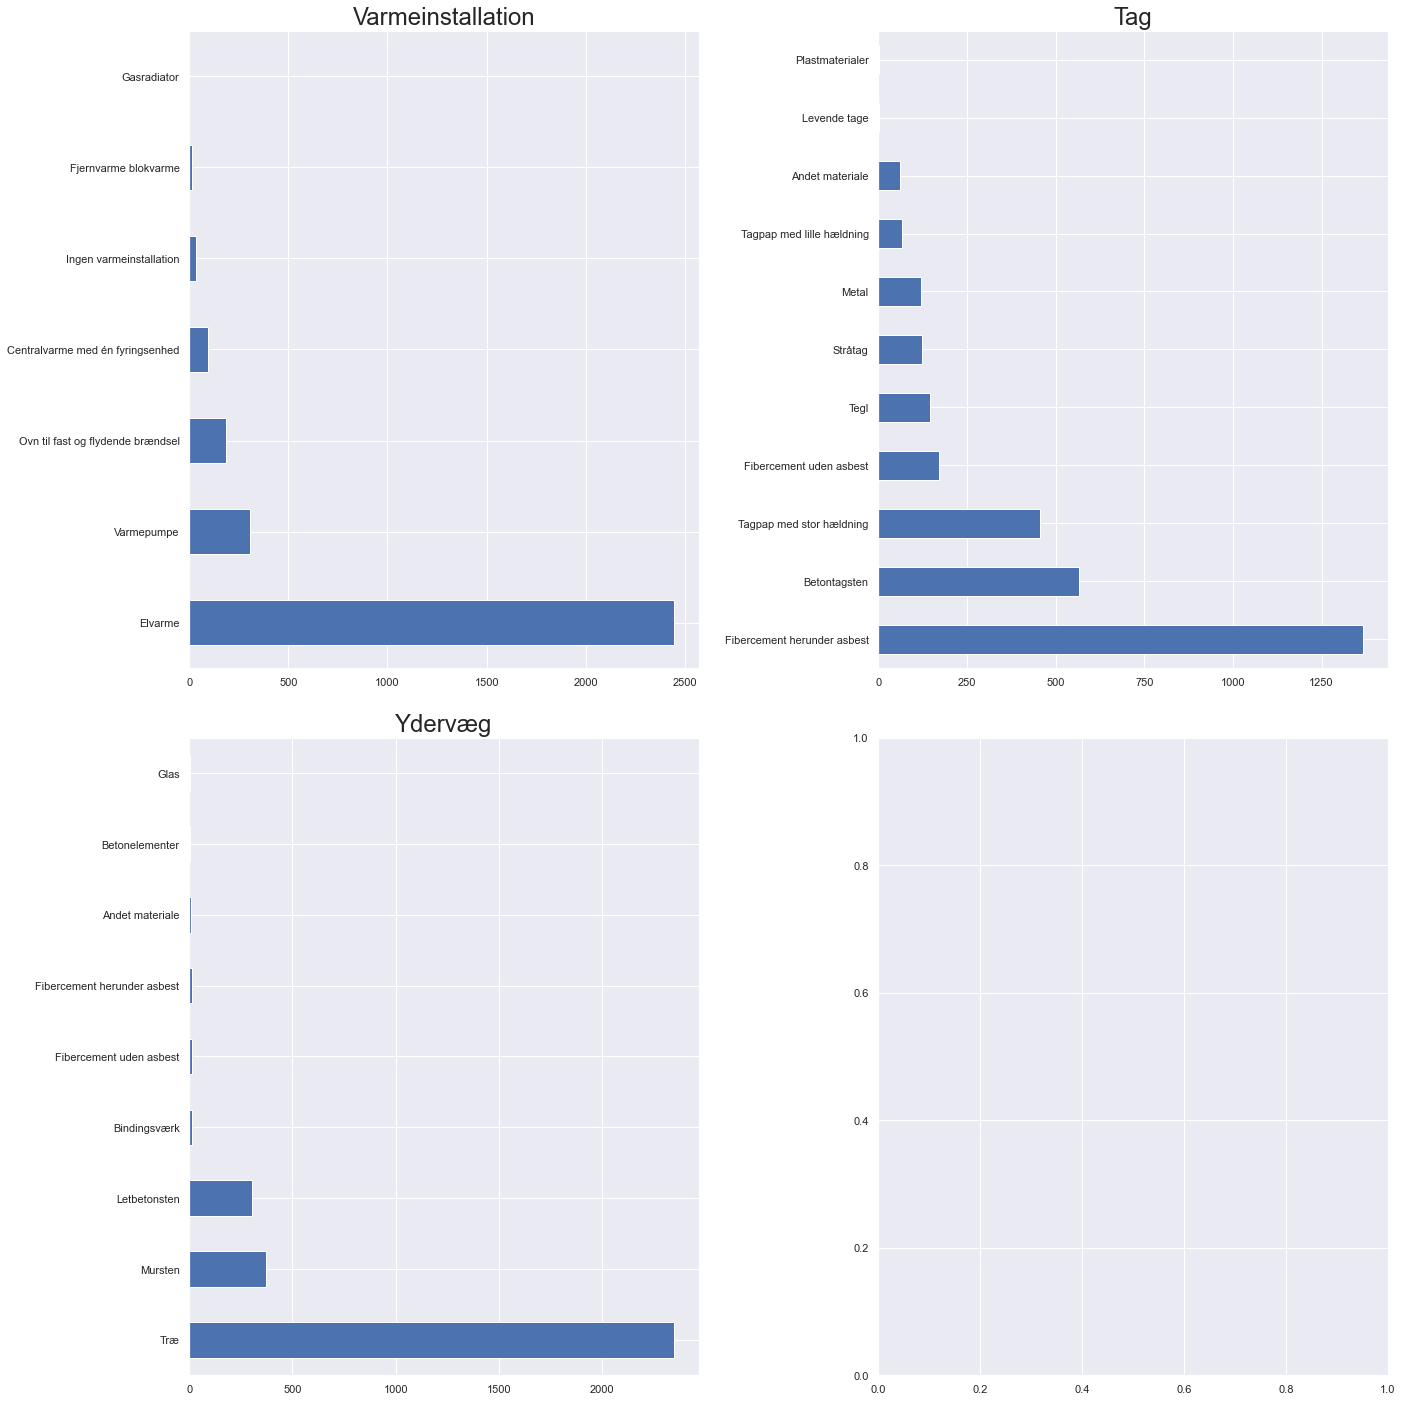

In [18]:
sb.set()
n_row = 2
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
sb.set(font_scale=2)
for i in enumerate(categ):
    pd.value_counts(data[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

In [19]:
# bring categories into a numerical format:
for i in categ:
    data[i] = data[i].factorize()[0]
data.head()

,Adresse,Year build,Pris,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Seneste ombygning,Boligenhed med eget køkken,Varmeinstallation,Grundstørrelse,Ejendomsværdiskat,Grundskyld
20,4500,1971,565000.0,1388.0,58.0,3.0,1.0,0.0,0,0,0.0,1.0,0,1261.0,3200.0,6123.0
23,4300,1967,500000.0,1087.0,6.0,1.0,0.0,0.0,0,1,0.0,0.0,1,2110.0,2310.0,3734.0
27,9560,1985,649000.0,1110.0,57.0,4.0,1.0,1.0,0,1,0.0,0.0,0,1215.0,3400.0,3900.0
40,4873,1965,795000.0,1744.0,65.0,3.0,1.0,1.0,1,2,0.0,0.0,0,1000.0,3675.0,9447.0
52,4970,2009,1045000.0,1061.0,74.0,4.0,1.0,1.0,0,3,0.0,0.0,0,1200.0,4095.0,2760.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3084 entries, 20 to 38576
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Adresse                     3084 non-null   int64  
 1   Year build                  3084 non-null   int64  
 2   Pris                        3084 non-null   float64
 3   Ejerudgift                  3084 non-null   float64
 4   Enhedsareal                 3084 non-null   float64
 5   Værelser                    3084 non-null   float64
 6   Antal toiletter             3084 non-null   float64
 7   Antal badeværelser          3084 non-null   float64
 8   Ydervæg                     3084 non-null   int64  
 9   Tag                         3084 non-null   int64  
 10  Seneste ombygning           3084 non-null   float64
 11  Boligenhed med eget køkken  3084 non-null   float64
 12  Varmeinstallation           3084 non-null   int64  
 13  Grundstørrelse              308

In [21]:
y = data['Pris']
#X = data.drop(['Pris'], 'columns', inplace=True)
X = data[['Adresse', 'Year build', 'Ejerudgift', 'Enhedsareal', 'Værelser', 'Antal toiletter', 'Antal badeværelser',
          'Ydervæg', 'Tag', 'Seneste ombygning','Boligenhed med eget køkken', 'Varmeinstallation', 'Grundstørrelse','Ejendomsværdiskat','Grundskyld']] #, 'Grundstørrelse' print(pd.value_counts(data['Værelser']<10.000000)), , 'Etager' 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)


lm = DecisionTreeRegressor(random_state=10, max_leaf_nodes=50)
lm.fit(X_train, y_train)
lm.predict(X.head())
print (lm)
#coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

DecisionTreeRegressor(max_leaf_nodes=50, random_state=10)


In [22]:
from sklearn.metrics import mean_absolute_error

## Defined a function to calculate mae
def get_mae(max_leaf_nodes, train_X, train_y,test_X, test_y):
    model_2 = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=454)
    model_2.fit(train_X,train_y)
    pred_y = model_2.predict(test_X)
    mae = mean_absolute_error(test_y,pred_y)
    return mae

for max_leaves in [2,3,5,30,40,50,60,150,200,250,300,500,1000,3000,5000,18000,50000]:
    my_mae = get_mae(max_leaves,X_train,y_train,X_test,y_test)
    print("max leaf nodes : %d \t and Mean Absolute error : %d"%(max_leaves,my_mae))


max leaf nodes : 2 	 and Mean Absolute error : 380977
max leaf nodes : 3 	 and Mean Absolute error : 362424
max leaf nodes : 5 	 and Mean Absolute error : 329822
max leaf nodes : 30 	 and Mean Absolute error : 303765
max leaf nodes : 40 	 and Mean Absolute error : 311081
max leaf nodes : 50 	 and Mean Absolute error : 314284
max leaf nodes : 60 	 and Mean Absolute error : 313765
max leaf nodes : 150 	 and Mean Absolute error : 329107
max leaf nodes : 200 	 and Mean Absolute error : 338384
max leaf nodes : 250 	 and Mean Absolute error : 343023
max leaf nodes : 300 	 and Mean Absolute error : 349251
max leaf nodes : 500 	 and Mean Absolute error : 365225
max leaf nodes : 1000 	 and Mean Absolute error : 375319
max leaf nodes : 3000 	 and Mean Absolute error : 376341
max leaf nodes : 5000 	 and Mean Absolute error : 376341
max leaf nodes : 18000 	 and Mean Absolute error : 376341
max leaf nodes : 50000 	 and Mean Absolute error : 376341


In [23]:
#print(coeff_df)
X.head()

,Adresse,Year build,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Seneste ombygning,Boligenhed med eget køkken,Varmeinstallation,Grundstørrelse,Ejendomsværdiskat,Grundskyld
20,4500,1971,1388.0,58.0,3.0,1.0,0.0,0,0,0.0,1.0,0,1261.0,3200.0,6123.0
23,4300,1967,1087.0,6.0,1.0,0.0,0.0,0,1,0.0,0.0,1,2110.0,2310.0,3734.0
27,9560,1985,1110.0,57.0,4.0,1.0,1.0,0,1,0.0,0.0,0,1215.0,3400.0,3900.0
40,4873,1965,1744.0,65.0,3.0,1.0,1.0,1,2,0.0,0.0,0,1000.0,3675.0,9447.0
52,4970,2009,1061.0,74.0,4.0,1.0,1.0,0,3,0.0,0.0,0,1200.0,4095.0,2760.0


In [24]:
print(data.iloc[20])

Adresse                         4654.0
Year build                      1994.0
Pris                          975000.0
Ejerudgift                      1530.0
Enhedsareal                       53.0
Værelser                           4.0
Antal toiletter                    1.0
Antal badeværelser                 1.0
Ydervæg                            0.0
Tag                                1.0
Seneste ombygning                  0.0
Boligenhed med eget køkken         0.0
Varmeinstallation                  0.0
Grundstørrelse                  1319.0
Ejendomsværdiskat               5600.0
Grundskyld                      7063.0
Name: 349, dtype: float64


In [25]:
print('training score')
print(lm.score(X_train, y_train))

training score
0.7330826984822328


In [26]:
print('test score')
print(lm.score(X_test, y_test))

test score
0.532787065683356


In [27]:
predictions = lm.predict(X_test)

mae2 = mean_absolute_error(y_test, predictions)
print(mae2)

311708.1978009518


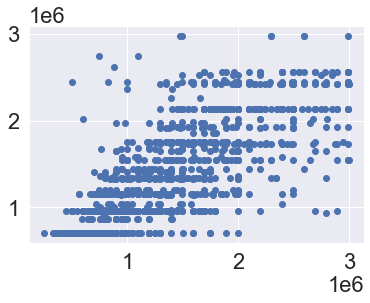

In [28]:
plt.scatter(y_test, predictions)

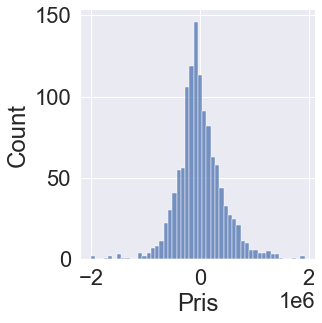

In [29]:
sb.displot((y_test-predictions), bins=50)